In [1]:
%%capture

!pip install jcopml

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from jcopml.plot import plot_missing_value, plot_correlation_ratio

In [5]:

df = pd.read_csv('FoodSales.csv')


In [7]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [9]:
# Fill NaN values with the most frequent value (mode) in 'transaction_type'
most_frequent = df['transaction_type'].mode()[0]
df['transaction_type'] = df['transaction_type'].fillna(most_frequent)


In [11]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Cash,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Cash,Mrs.,Afternoon


In [13]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Cash,Mr.,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Cash,Mrs.,Afternoon


In [15]:
df.shape

(1000, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [19]:
df.duplicated().sum()

0

,missing_value,%
order_id,0,0.0
date,0,0.0
item_name,0,0.0
item_type,0,0.0
item_price,0,0.0
quantity,0,0.0
transaction_amount,0,0.0
transaction_type,0,0.0
received_by,0,0.0
time_of_sale,0,0.0


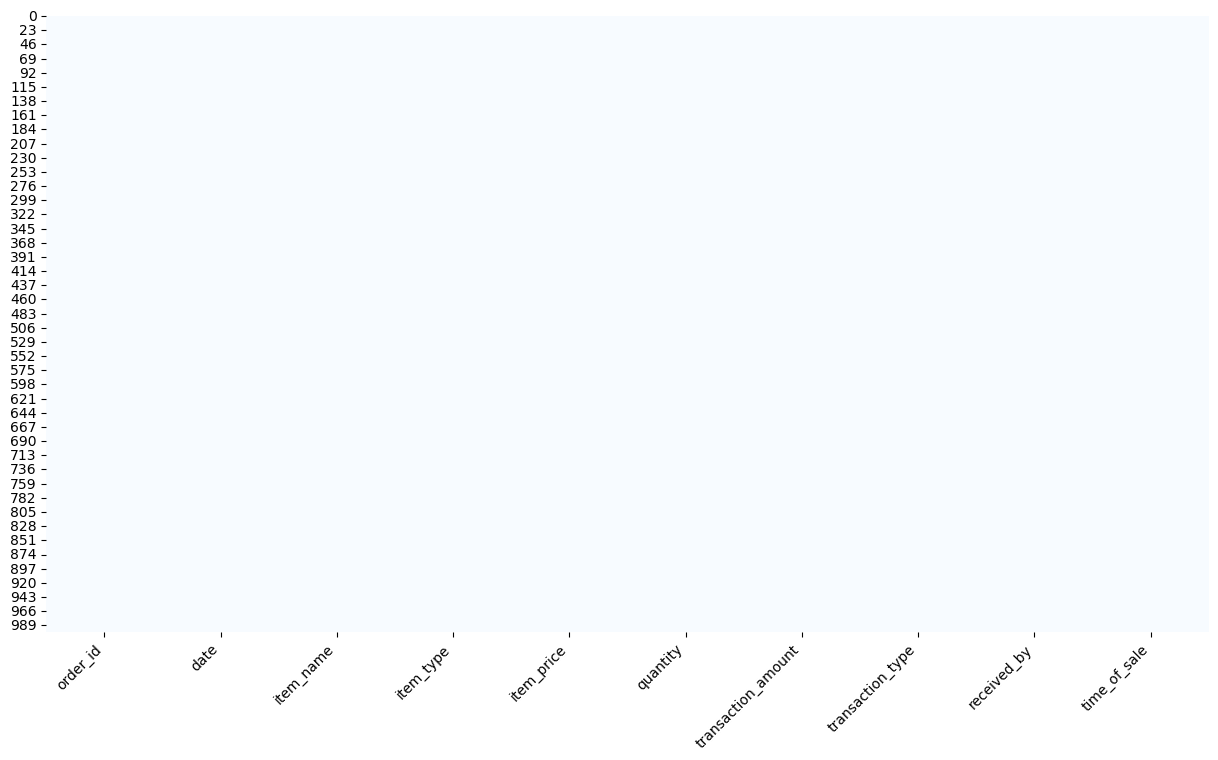

In [21]:
display(plot_missing_value(df, return_df='True', feature_alignment='v'))

In [23]:
df.describe().style.background_gradient(cmap='RdYlBu')

,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-03 14:39:50.400000,33.315000,8.162000,275.230000
min,1.000000,2022-04-01 00:00:00,20.000000,1.000000,20.000000
25%,250.750000,2022-07-04 00:00:00,20.000000,4.000000,120.000000
50%,500.500000,2022-10-07 12:00:00,25.000000,8.000000,240.000000
75%,750.250000,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,1000.000000,2023-03-30 00:00:00,60.000000,15.000000,900.000000
std,288.819436,nan,14.921744,4.413075,204.402979


In [25]:
df.describe(include='object')

,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,1000,1000,1000
unique,7,2,2,2,5
top,Cold coffee,Fastfood,Cash,Mr.,Night
freq,161,686,583,512,205


# Observations:

- the data contains 1000 rows and 9 columns
- there is no duplicate values in data
- There are 107 missing values in the transaction type column. In this case, we will impute the missing values using the mode/most_frequent method.

### Statistics Descriptive Observation
##### Date:

- The transactions in the dataset span from April 1, 2022, to March 30, 2023.

##### Item Price:

- The prices of items in the dataset range from 20 to 60.
- On average, the item price is approximately 33.32.
- The standard deviation of item prices is approximately 14.92.

##### Quantity:

- The quantity of items in a transaction ranges from 1 to 15.
- On average, the quantity of items in a transaction is approximately 8.16.
- The standard deviation of the quantity is approximately 4.41.

##### Transaction Amount:

- The transaction amounts range from 20 to 900.
- On average, the transaction amount is approximately 275.23.
- The standard deviation of transaction amounts is approximately 204.40.

##### Percentile:

- 25% of transactions have a total amount of 120 or less.
- 50% of transactions have a total amount of 240 or less.
- 75% of transactions have a total amount of 360 or less.

##### Min and Max:

- The minimum transaction amount is 20, while the maximum is 900.

##### Item Name:

- There are 7 unique item names in the dataset.
- The most frequently occurring item name is "Cold coffee," which appears 161 times.

##### Item Type:

- There are 2 unique item types in the dataset.
- The most frequently occurring item type is "Fastfood," which appears 686 times.

##### Transaction Type:

- There are 2 unique transaction types in the dataset.
- The most frequently occurring transaction type is "Cash," which appears 476 times.

##### Received By:

- There are 2 unique recipients ("received_by") in the dataset.
- The most frequently occurring recipient is "Mr.," which appears 512 times.

##### Time of Sale:

- There are 5 unique time categories for sales.
- The most frequently occurring time category is "Night," which appears 205 times.


# Exploratory Data Analysis (EDA)

## Question asked from the data:
- What is the overall trend in transaction amounts over time?
- Which item name are most commonly sold?
- Which item type are most commonly sold
- Which transaction type is the most commonly used?
- Who is the most common recipient of transactions?
- When is the best-selling time?

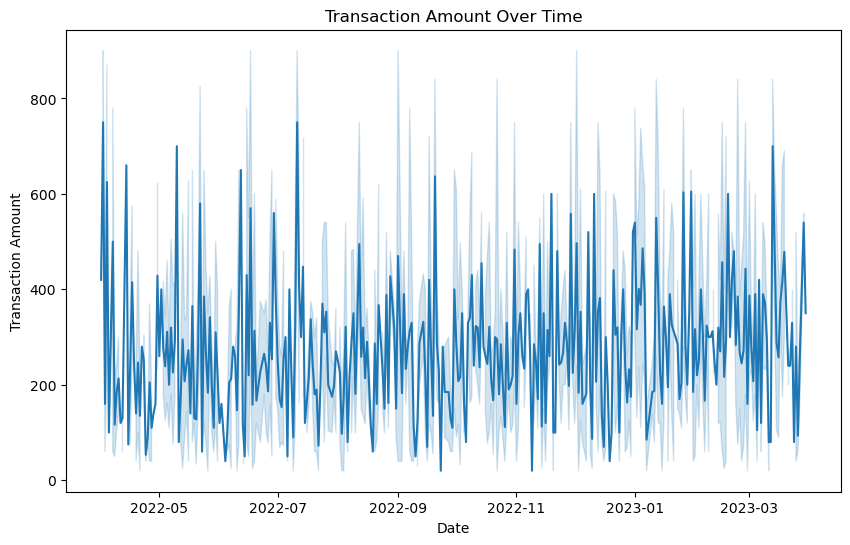

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='transaction_amount', data=df)
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

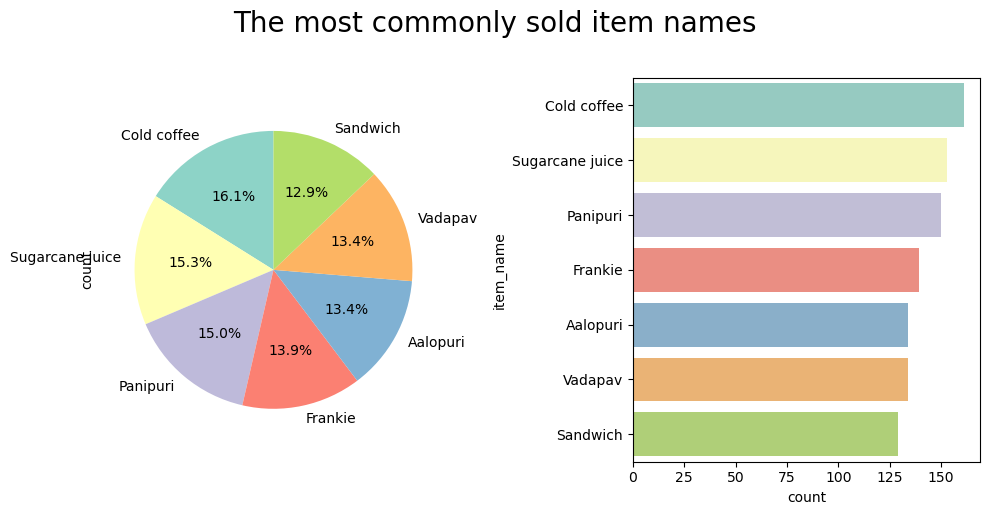

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['item_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(y='item_name', data=df, palette='Set3', order=df['item_name'].value_counts().index)

plt.suptitle('The most commonly sold item names', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

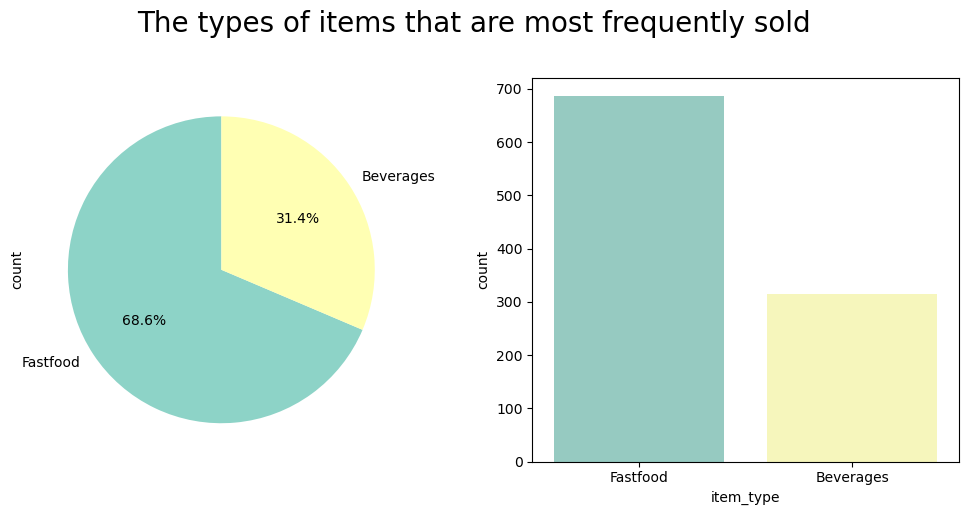

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['item_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(x='item_type', data=df, palette='Set3')

plt.suptitle('The types of items that are most frequently sold', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

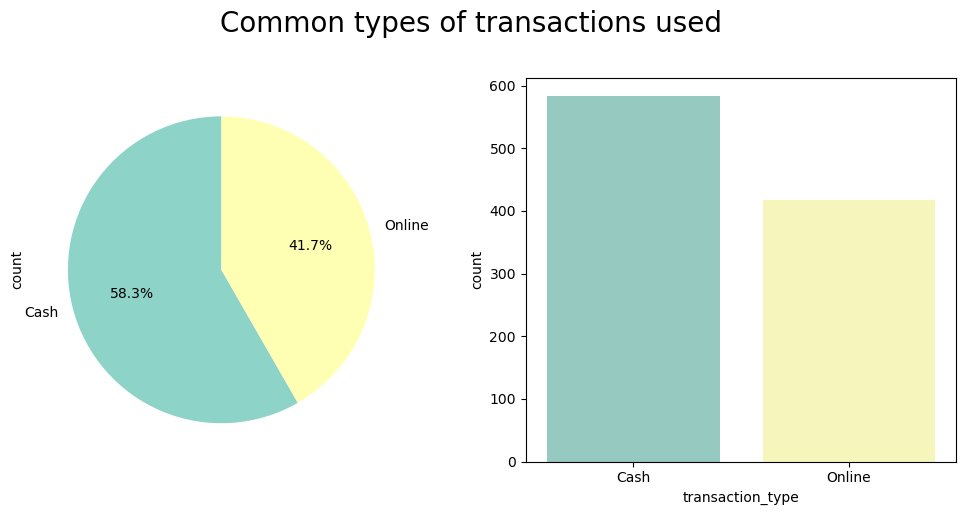

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['transaction_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(x='transaction_type', data=df, palette='Set3')

plt.suptitle('Common types of transactions used', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

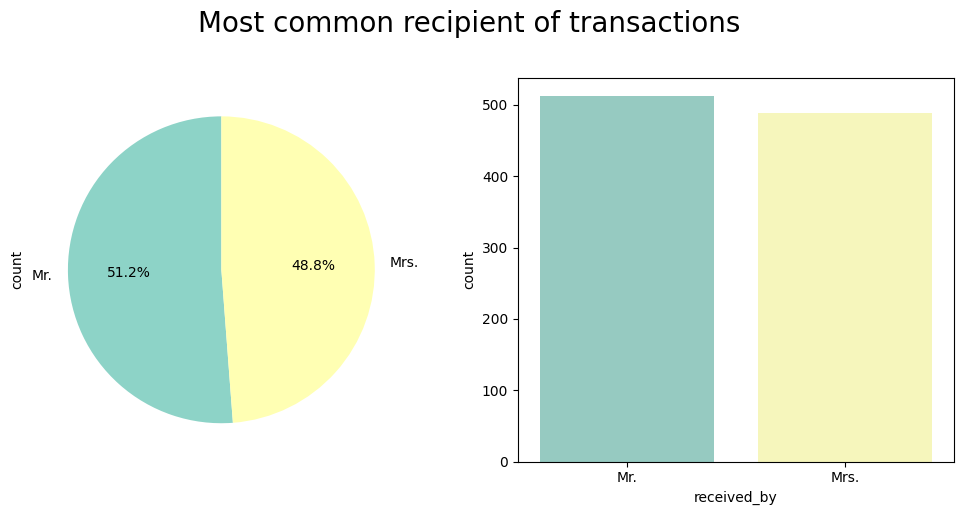

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['received_by'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(x='received_by', data=df, palette='Set3')

plt.suptitle('Most common recipient of transactions', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

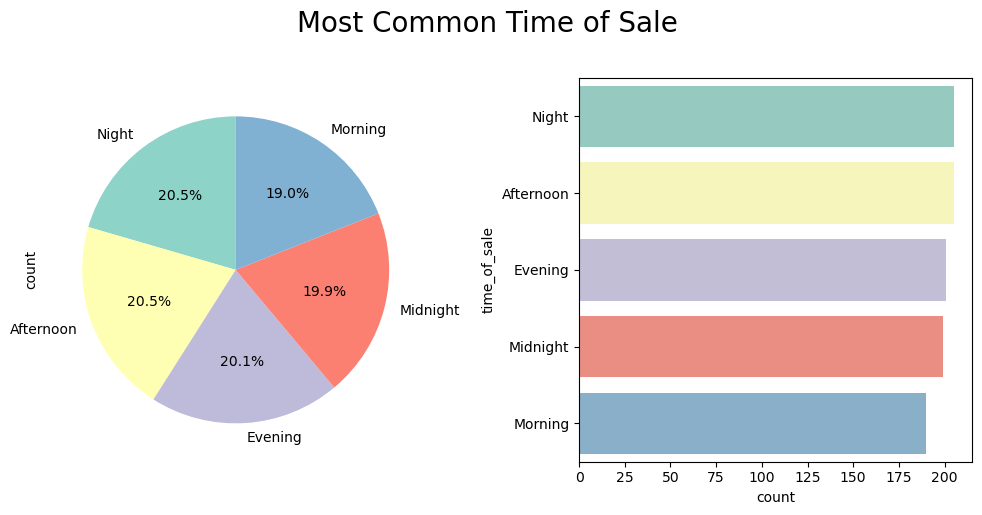

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['time_of_sale'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(y='time_of_sale', data=df, palette='Set3', order=df['time_of_sale'].value_counts().index)

plt.suptitle('Most Common Time of Sale', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

# Observations:

- It appears that the transaction pattern over time does not exhibit a significant trend
- <b>Cold coffee</b> is the best-selling item, accounting for approximately 16.1%, followed by <b>Sugarcane juice</b> juice at 15.3%, and <b>Panipuri</b> at 15% in sales.
- <b>Fast food</b> is the most frequently sold item type, with a percentage of 68.6%
- The most commonly used payment method is <b>Cash</b>, with a percentage of 58.3%
- In this data, the recipients have almost balanced proportions, with <b>Mr.</b> at 51.2% and <b>Mrs.</b> at 48.8%.
- The best-selling times are in the <b>Night</b> and <b>Afternoon</b>, both having an equal percentage of 20.5%.

# More question asked from the data:
- What item has the highest price?
- Which month is <b>cold coffee</b> frequently sold?
- When is <b>cold coffee</b> frequently sold?
- Which item is most frequently bought in bulk?
- Which items are often purchased by <b>Mr.</b>?
- Is there a correlation between the <b>transaction amount</b> and the <b>quantity</b>?

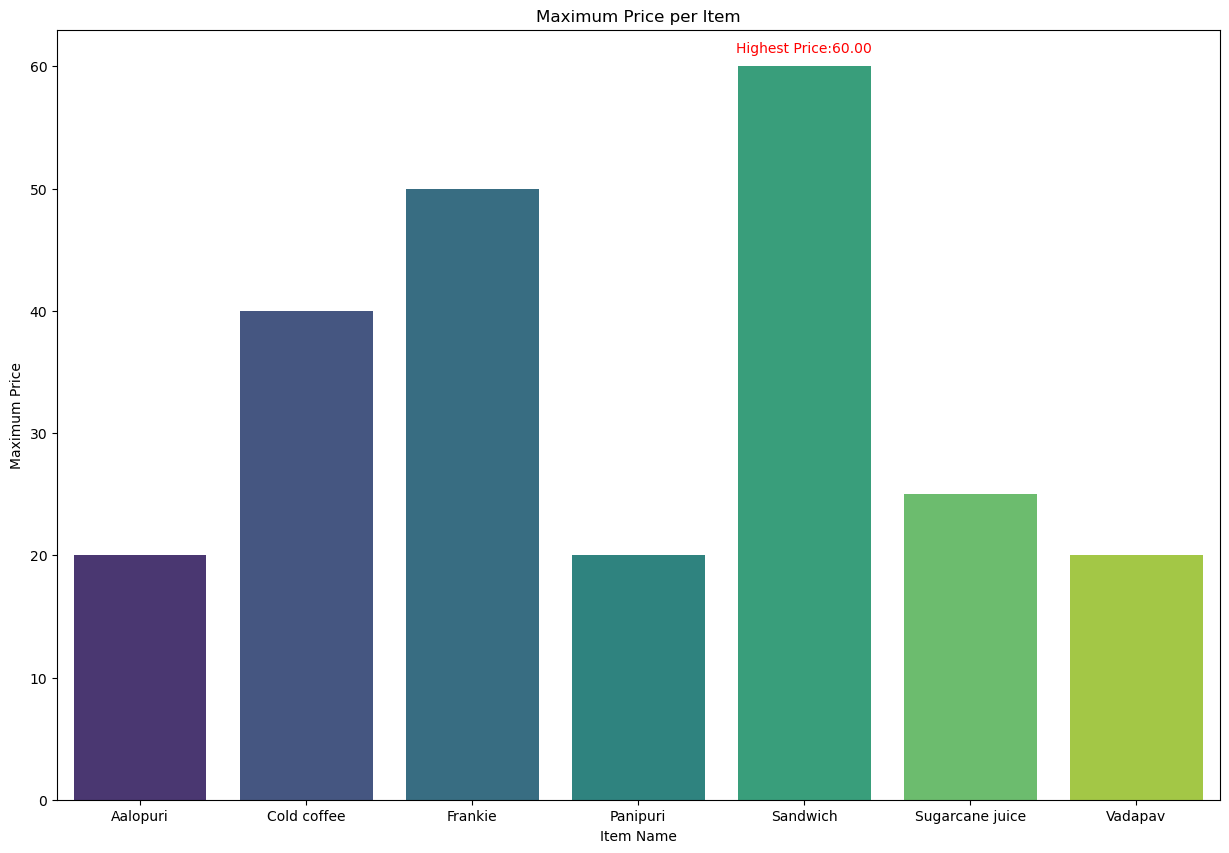

In [37]:
max_price_per_item = df.groupby('item_name')['item_price'].max().reset_index()

item_highest_price = max_price_per_item.loc[max_price_per_item['item_price'].idxmax(), 'item_name']
highest_price = max_price_per_item['item_price'].max()

plt.figure(figsize=(15, 10))
sns.barplot(x='item_name', y='item_price', data=max_price_per_item, palette='viridis')
plt.title('Maximum Price per Item')
plt.xlabel('Item Name')
plt.ylabel('Maximum Price')

plt.annotate(f'Highest Price:{highest_price:.2f}', 
             xy=(max_price_per_item[max_price_per_item['item_name'] == item_highest_price].index[0], highest_price),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center',
             fontsize=10,
             color='red')

plt.show()

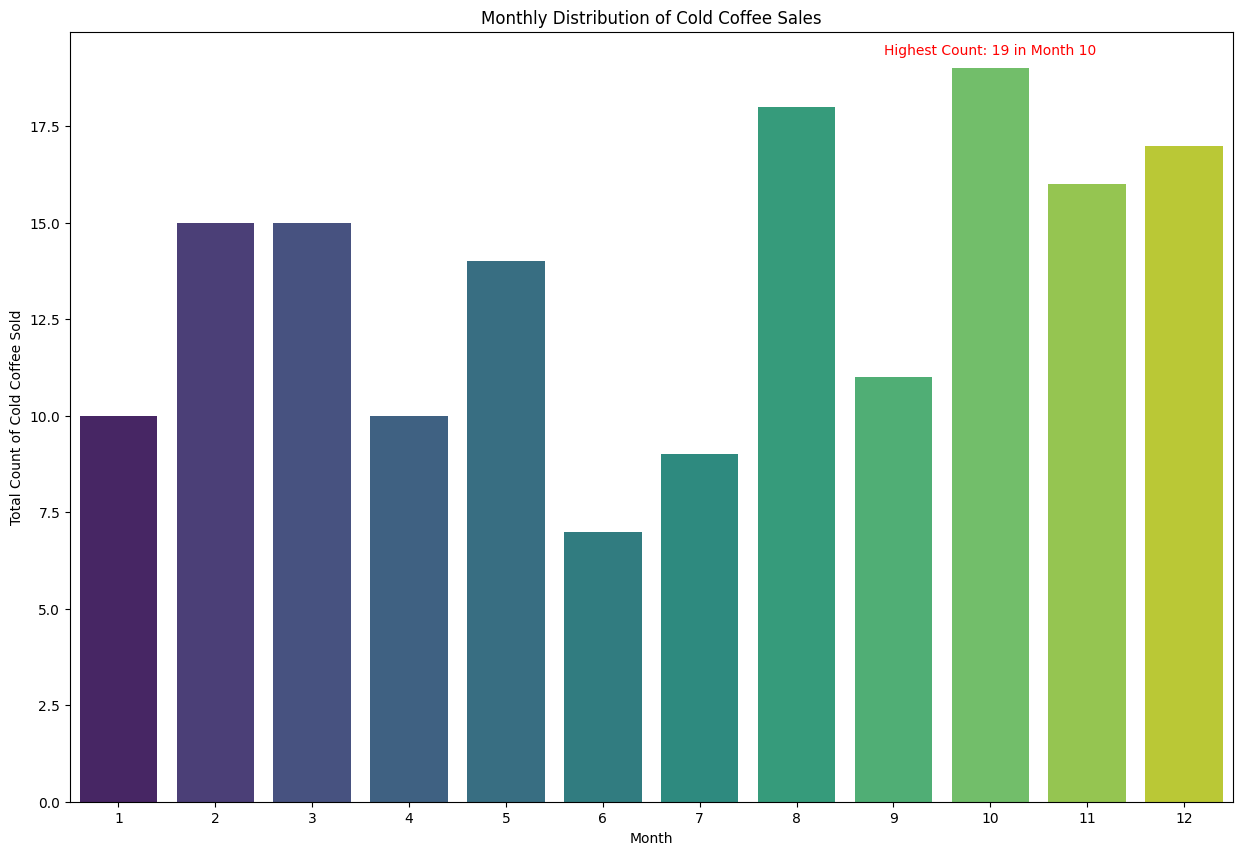

In [20]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month

cold_coffee_data = df[df['item_name'] == 'Cold coffee']

monthly_cold_coffee_count = cold_coffee_data.groupby('month')['item_name'].count()

plt.figure(figsize=(15, 10))
sns.barplot(x=monthly_cold_coffee_count.index, y=monthly_cold_coffee_count.values, palette='viridis')
plt.title('Monthly Distribution of Cold Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Total Count of Cold Coffee Sold')

highest_count_month = monthly_cold_coffee_count.idxmax()
highest_count = monthly_cold_coffee_count.max()

plt.annotate(f'Highest Count: {highest_count} in Month {highest_count_month}', 
             xy=(highest_count_month - 1, highest_count),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center',
             fontsize=10,
             color='red')

plt.show()

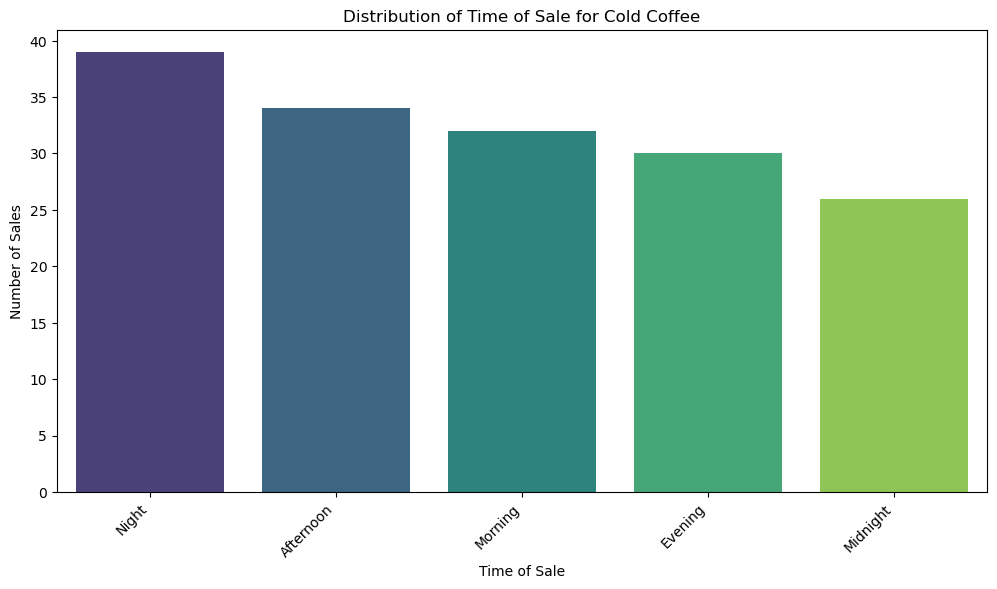

In [39]:
cold_coffee_data = df[df['item_name'] == 'Cold coffee']

time_of_sale_counts = cold_coffee_data['time_of_sale'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_sale', data=cold_coffee_data, order=time_of_sale_counts.index, palette='viridis')
plt.title('Distribution of Time of Sale for Cold Coffee')
plt.xlabel('Time of Sale')
plt.ylabel('Number of Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

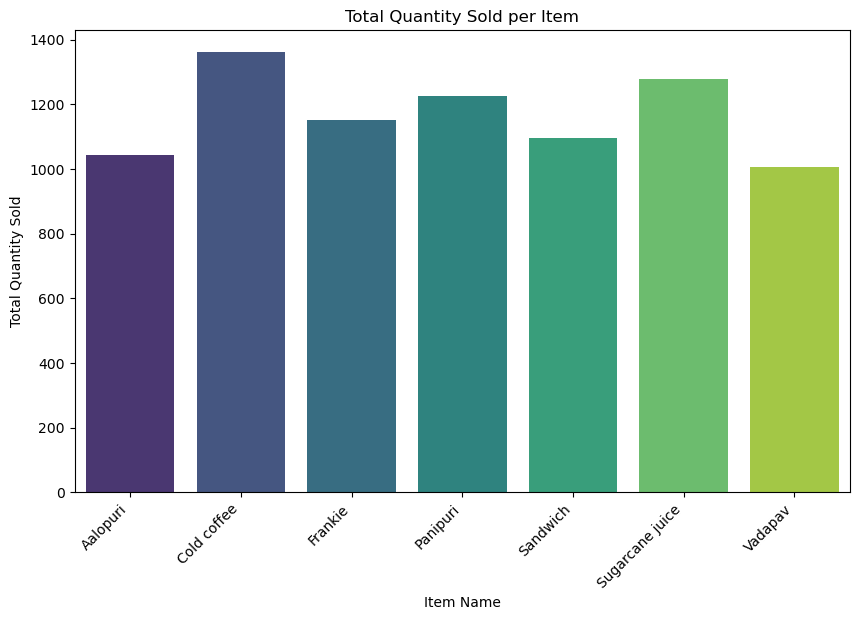

The item most frequently bought in bulk is 'Cold coffee' with a total quantity of 1361.


In [41]:
total_quantity_per_item = df.groupby('item_name')['quantity'].sum()

item_most_frequently_bought = total_quantity_per_item.idxmax()
highest_quantity = total_quantity_per_item.max()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_quantity_per_item.index, y=total_quantity_per_item.values, palette='viridis')
plt.title('Total Quantity Sold per Item')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

print(f"The item most frequently bought in bulk is '{item_most_frequently_bought}' with a total quantity of {highest_quantity}.")

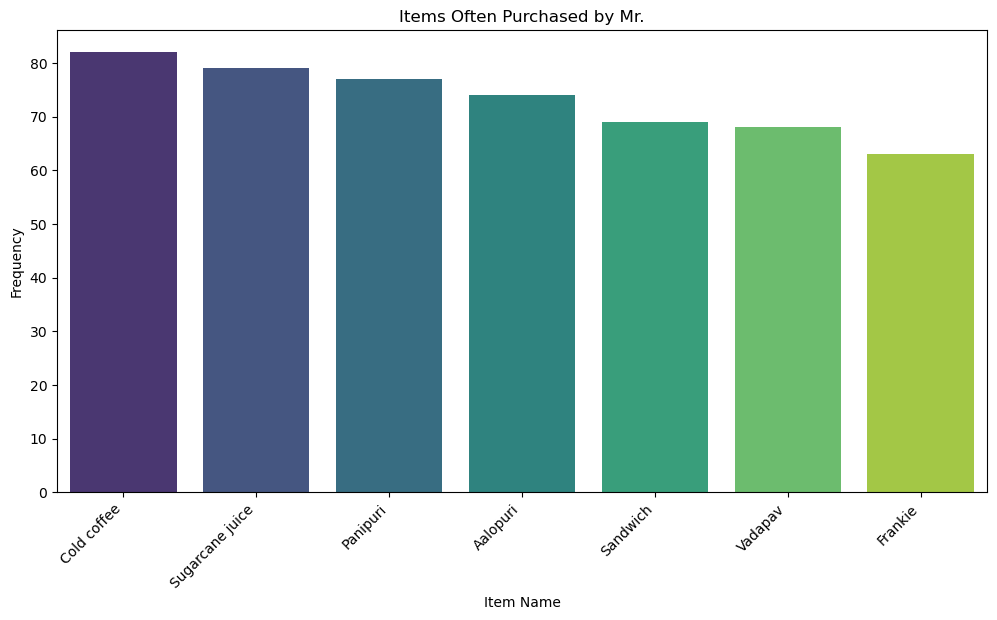

In [43]:
mr_transactions = df[df['received_by'] == 'Mr.']

item_counts_mr = mr_transactions['item_name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts_mr.index, y=item_counts_mr.values, palette='viridis')
plt.title('Items Often Purchased by Mr.')
plt.xlabel('Item Name')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: >

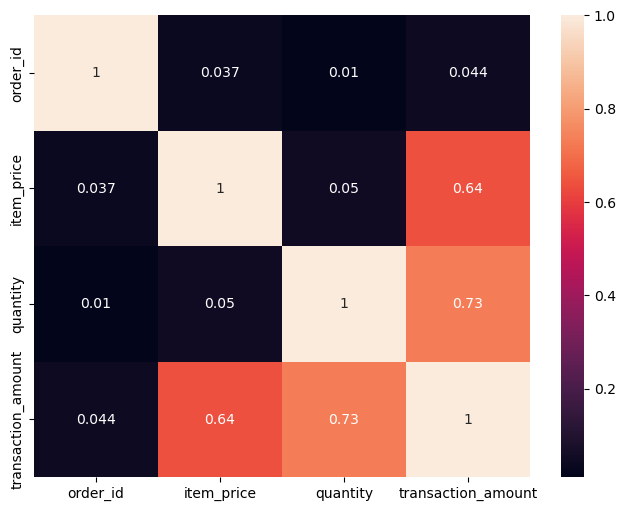

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Observations:
- The item with the highest price is <b>Sandwich</b>, which is 60.00
- <b>In October</b>, Cold Coffee had quite high sales figures.
- Cold coffee is often sold in the <b>Evening</b>.
- The item that is often bought in bulk is <b>Cold Coffee</b>.
- The item that is frequently purchased by Mr. is <b>Cold Coffee</b>.
- It seems that there is a <b>positive correlation of 73%</b> between transaction_amount and quantity.